In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import numpy as np
import pandas as pd
from chainconsumer import ChainConsumer, Chain
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18
import astropy.units as u

In [2]:
def rdrag_desy1(Om0, H0):
    r_d = 147.05
    N_eff= Planck18.Neff
    h= H0/100
    omega_b_h2_mean = 0.02218
    omega_b_h2_sigma = 0.00055
    omega_b_h2 = np.random.normal(omega_b_h2_mean, omega_b_h2_sigma)
    omega_m_h2 = Om0 *h**2
    r_drag = r_d * (omega_m_h2 / 0.1432) ** (-0.23) * (N_eff / 3.04) ** (-0.1) * (omega_b_h2 / 0.02236) ** (-0.13)
    return r_drag

#cmbv1
samples_selectedwith_H0_nocmb = np.load('data/samples_selectedwith_H0_nocmb.npy')
samples_selected = np.load('data/samples_selected.npy')

In [3]:
rdrag_desy1(0.28, 67)

151.7127642971065

In [4]:
samples_selectedwith_H0_nocmb

array([[ 0.34379893, -0.82953032, -0.84563923],
       [ 0.35586744, -0.80508393, -1.06110113],
       [ 0.34065587, -0.79012562, -0.95670733],
       ...,
       [ 0.34843266, -0.8815558 , -0.742638  ],
       [ 0.3381003 , -1.01626387,  0.20045846],
       [ 0.32619725, -0.91730328, -0.13046228]])

In [5]:
df_samples_selectedwith_H0_nocmb = pd.DataFrame(samples_selectedwith_H0_nocmb, columns=["$\Omega_m$", "$w_0$", "$w_a$"])
df_samples_selected = pd.DataFrame(samples_selected, columns=["$\Omega_m$", "$w_0$", "$w_a$"])

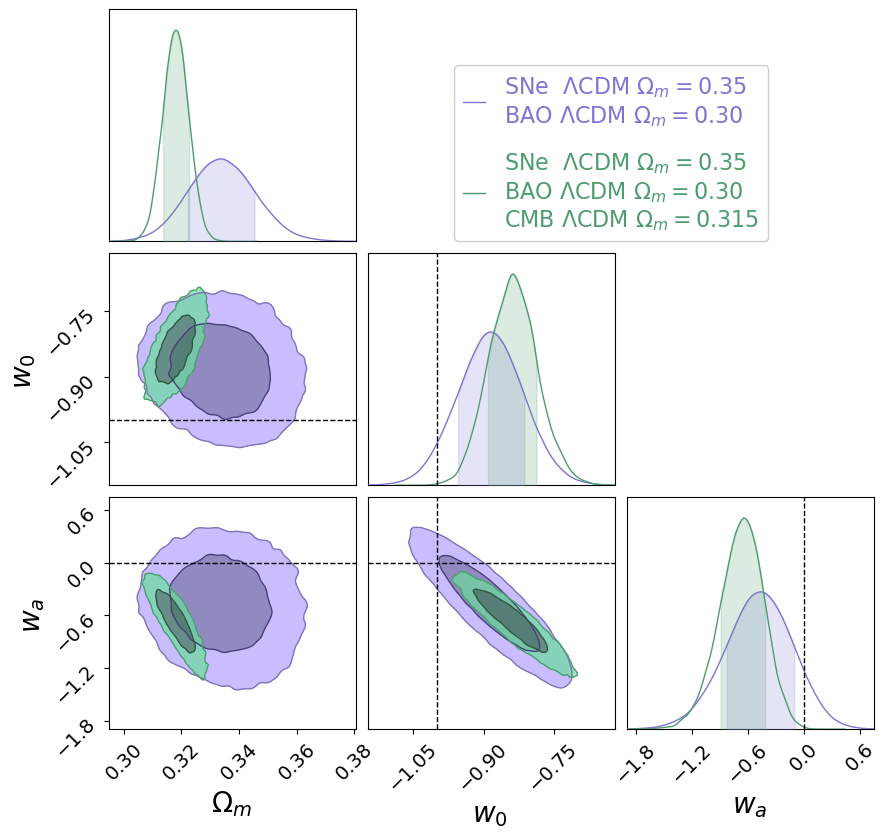

In [6]:
import pandas as pd
import numpy as np
from chainconsumer import Chain, ChainConfig, ChainConsumer, PlotConfig, Truth, make_sample
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

c = ChainConsumer()


c.add_chain(Chain(samples=df_samples_selectedwith_H0_nocmb, name="SNe  $\Lambda$CDM $\Omega_m = 0.35$ \n  BAO $\Lambda$CDM $\Omega_m = 0.30$", color='#8073D4'))

#c.add_chain(
 #   Chain(samples=data_sn_bao_cmb_cleaned[['$w_0$', '$w_a$', '$\Omega_m$', 'weight']], 
 #         name="Planck+DES SNY5+eBOSS+3x2pt",color="#D55E00")
#)


c.add_chain(Chain(samples=df_samples_selected, name="SNe  $\Lambda$CDM $\Omega_m = 0.35$ \n  BAO $\Lambda$CDM $\Omega_m = 0.30$ \n  CMB $\Lambda$CDM $\Omega_m = 0.315$", color='#4D9C70'))

plot_config = PlotConfig(
    summary=True,
    bins=1.5,
    smooth=1,
    shade=True,
    label_font_size=20,
    bar_shade=True,
    sigmas=[0, 1, 2],
    legend_kwargs={
    "loc": (-0.7,0),
    "fontsize": 16,
    "frameon": True,
    "shadow": False, 
    "fancybox": True, 
    "framealpha": 1,
    "borderaxespad": 10,
    "ncol": 1,
    "labelspacing": 1.0
})

c.set_plot_config(plot_config)
c.add_truth(Truth(location={"$w_0$": -1, "$w_a$": 0}))
fig = c.plotter.plot(figsize="large")
ax_list = fig.get_axes()

for ax in ax_list:
    ax.grid(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    
plt.show()

fig.savefig("ltow0wa.png", dpi=600, bbox_inches='tight')
 

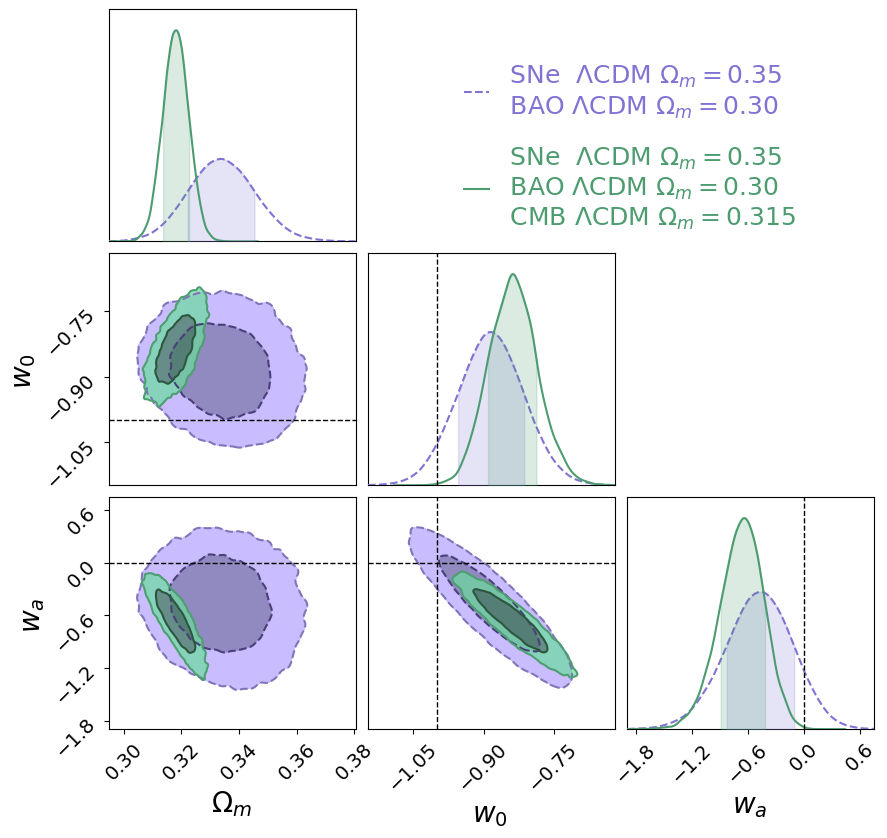

In [7]:
import pandas as pd
import numpy as np
from chainconsumer import Chain, ChainConfig, ChainConsumer, PlotConfig, Truth, make_sample
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

c = ChainConsumer()

c.add_chain(Chain(samples=df_samples_selectedwith_H0_nocmb,
                  name="SNe  $\Lambda$CDM $\Omega_m = 0.35$ \n  BAO $\Lambda$CDM $\Omega_m = 0.30$", 
                  color='#8073D4', linewidth=1.5,linestyle="--",alpha=0.5))

plot_config = PlotConfig(
    shade=False,
)
c.set_plot_config(plot_config)


#c.add_chain(
  #  Chain(samples=data_sn_bao_cmb_cleaned[['$w_0$', '$w_a$', '$\\Omega_m$', 'weight']], 
  #        name="Planck+DES SNY5+eBOSS+3x2pt", 
  #        color="#D55E00"
   #       ,linestyle="-",linewidth=2.0)
     #     color="#D55E00")
#)

c.add_chain(Chain(samples=df_samples_selected, 
                  name="SNe  $\Lambda$CDM $\Omega_m = 0.35$ \n  BAO $\Lambda$CDM $\Omega_m = 0.30$ \n  CMB $\Lambda$CDM $\Omega_m = 0.315$", 
                  color='#4D9C70',linestyle="-",linewidth=1.5),)

plot_config = PlotConfig(
    summary=True,
    bins=1.5,
    smooth=1,
    shade=True,
    label_font_size=20,
    bar_shade=True,
    sigmas=[0, 1, 2],
    lengend=False,
    legend_kwargs={
        "loc": (-0.7, 0),        
        "fontsize": 18,           # Font size of legend text
        "frameon": False,          # Frame around the legend
        "shadow": False, 
        "fancybox": True, 
        "framealpha": 1,
        "borderaxespad": 10,
        "ncol": 1,
        "labelspacing": 1.0
    }
)

c.set_plot_config(plot_config)
c.add_truth(Truth(location={"$w_0$": -1, "$w_a$": 0}))
fig = c.plotter.plot(figsize="large")
ax_list = fig.get_axes()

for ax in ax_list:
    ax.grid(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    if ax.get_xlabel() == "$w_0$" and ax.get_ylabel() == "$w_a$":
        rect = Rectangle(
            xy=(-0.9, -1.5),
            width=0.3,
            height=0.5,
            linewidth=1,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.annotate("Highlighted Region", xy=(-0.85, -1.4), color="red", fontsize=12)

for ax in ax_list:
    ax.grid(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()
fig.savefig("ltow0wa.png", dpi=600, bbox_inches='tight')


In [9]:
samples_bao_cmb_selected = np.load('data/samples_bao_cmb_selected.npy')

In [10]:
df_samples_bao_cmb_selected = pd.DataFrame(samples_bao_cmb_selected, columns=["$\Omega_m$", "$w_0$", "$w_a$"])

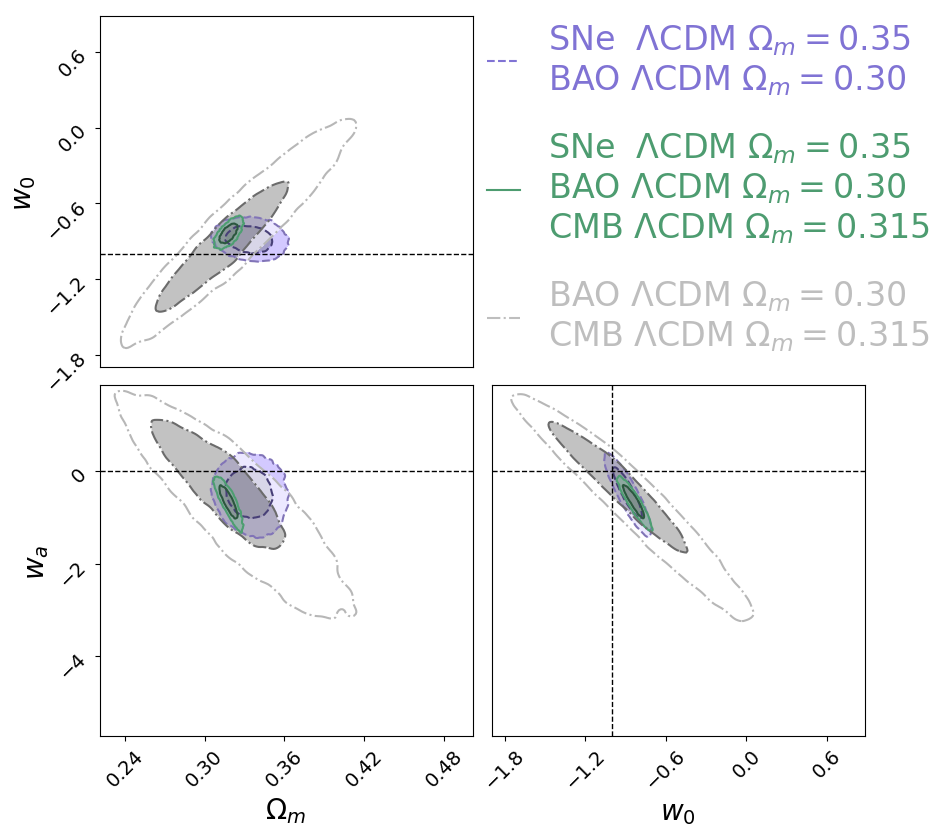

In [11]:
import pandas as pd
import numpy as np
from chainconsumer import Chain, ChainConfig, ChainConsumer, PlotConfig, Truth, make_sample
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

c = ChainConsumer()

c.add_chain(Chain(samples=df_samples_selectedwith_H0_nocmb,
                  name="SNe  $\Lambda$CDM $\Omega_m = 0.35$ \n  BAO $\Lambda$CDM $\Omega_m = 0.30$", 
                  color='#8073D4', linewidth=1.5,linestyle="--",alpha=0.5, histogram_relative_height=1.0))

plot_config = PlotConfig(
    shade=False,
)
c.set_plot_config(plot_config)

#c.add_chain(
  #  Chain(samples=data_sn_bao_cmb_cleaned[['$w_0$', '$w_a$', '$\\Omega_m$', 'weight']], 
  #        name="Planck+DES SNY5+eBOSS+3x2pt", 
  #        color="#D55E00"
   #       ,linestyle="-",linewidth=2.0)
     #     color="#D55E00")
#)

c.add_chain(Chain(samples=df_samples_selected, 
                  name="SNe  $\Lambda$CDM $\Omega_m = 0.35$ \n  BAO $\Lambda$CDM $\Omega_m = 0.30$ \n  CMB $\Lambda$CDM $\Omega_m = 0.315$", 
                  color='#4D9C70',linestyle="-",linewidth=1.5, histogram_relative_height=1.0),)

c.add_chain(Chain(samples=df_samples_bao_cmb_selected, 
                  name="BAO $\Lambda$CDM $\Omega_m = 0.30$ \n  CMB $\Lambda$CDM $\Omega_m = 0.315$", 
                  color='#BEBEBE',linestyle="dashdot",linewidth=1.5, histogram_relative_height=1.0,),)

plot_config = PlotConfig(
    summary=True,
    bins=1.5,
    smooth=1.,
    shade=True,
    label_font_size=20,
    plot_hists=False,
    bar_shade=True,
    sigmas=[0, 1, 2],
    lengend=False,
    legend_kwargs={
       # "loc": (-0.9, 0), 
       # "loc": (-0.25, -0.15), 
        "loc": (-0.05, 0),
        "fontsize": 24,
        "frameon": False,
        "shadow": False, 
        "fancybox": True, 
        "framealpha": 1,
        "borderaxespad": 10,
        "ncol": 1,
        "labelspacing": 1.0
    }
)

c.set_plot_config(plot_config)
c.add_truth(Truth(location={"$w_0$": -1, "$w_a$": 0}))
fig = c.plotter.plot(figsize="large")
ax_list = fig.get_axes()

for ax in ax_list:
    ax.grid(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

for ax in ax_list:
    ax.grid(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()
fig.savefig("ltow0wa.png", dpi=600, bbox_inches='tight')


In [12]:
print(c.analysis.get_latex_table())


\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccc}
        \hline
		Model & $\Omega_m$ & $w_0$ & $w_a$ \\ 
		\hline
		SNe  $\Lambda$CDM $\Omega_m = 0.35$ 
  BAO $\Lambda$CDM $\Omega_m = 0.30$ & $0.334^{+0.011}_{-0.012}$ & $-0.883^{+0.070}_{-0.072}$ & $-0.46^{+0.35}_{-0.37}$ \\ 
		SNe  $\Lambda$CDM $\Omega_m = 0.35$ 
  BAO $\Lambda$CDM $\Omega_m = 0.30$ 
  CMB $\Lambda$CDM $\Omega_m = 0.315$ & $\left( 318.0^{+4.7}_{-4.3} \right) \times 10^{-3}$ & $-0.837^{+0.050}_{-0.053}$ & $-0.65^{+0.23}_{-0.24}$ \\ 
		BAO $\Lambda$CDM $\Omega_m = 0.30$ 
  CMB $\Lambda$CDM $\Omega_m = 0.315$ & $0.314^{+0.032}_{-0.034}$ & $-0.98^{+0.39}_{-0.29}$ & $-0.05^{+0.71}_{-1.18}$ \\ 
		\hline
    \end{tabular}
\end{table}


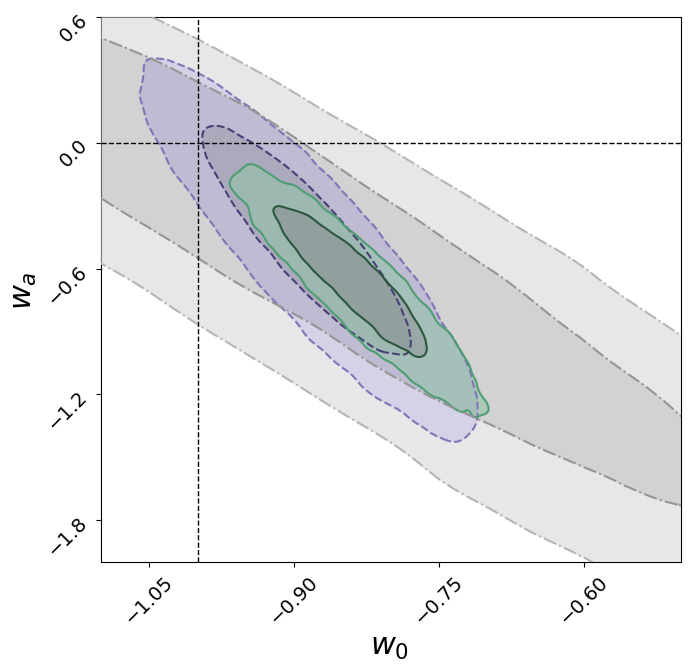

In [13]:
import pandas as pd
import numpy as np
from chainconsumer import Chain, ChainConfig, ChainConsumer, PlotConfig, Truth
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

c = ChainConsumer()

c.add_chain(Chain(samples=df_samples_selectedwith_H0_nocmb[['$w_0$', '$w_a$']], 
                  name="SNe  $\Lambda$CDM $\Omega_m = 0.35$ \n BAO $\Lambda$CDM $\Omega_m = 0.30$", 
                  color='#8073D4', linewidth=1.5, linestyle="--", alpha=0.5, histogram_relative_height=1.0))

c.add_chain(Chain(samples=df_samples_selected[['$w_0$', '$w_a$']], 
                  name="SNe  $\Lambda$CDM $\Omega_m = 0.35$ \n BAO $\Lambda$CDM $\Omega_m = 0.30$ \n CMB $\Lambda$CDM $\Omega_m = 0.315$", 
                  color='#4D9C70', linestyle="-", linewidth=1.5, histogram_relative_height=1.0))

c.add_chain(Chain(samples=df_samples_bao_cmb_selected[['$w_0$', '$w_a$']], 
                  name="BAO $\Lambda$CDM $\Omega_m = 0.30$ \n CMB $\Lambda$CDM $\Omega_m = 0.315$", 
                  color='#BEBEBE', linestyle="dashdot", linewidth=1.5, histogram_relative_height=1.0, shade_gradient=0.3, alpha=0.5))

plot_config = PlotConfig(
    summary=True,
    bins=1.5,
    smooth=1,
    label_font_size=22,
    plot_hists=False,
    shade=True,
    bar_shade=True,
    sigmas=[0, 1, 2],
    legend=False  
)
c.set_plot_config(plot_config)

c.add_truth(Truth(location={"$w_0$": -1, "$w_a$": 0}))

fig = c.plotter.plot(figsize="large")

for ax in fig.get_axes():
    legend = ax.get_legend()
    if legend:
        legend.remove() 

# Customize axes
for ax in fig.get_axes():
    ax.grid(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlim(-1.1, -0.5)  
    ax.set_ylim(-2.0, 0.6)

plt.show()
fig.savefig("ltow0wa_w0wa.png", dpi=600, bbox_inches='tight')


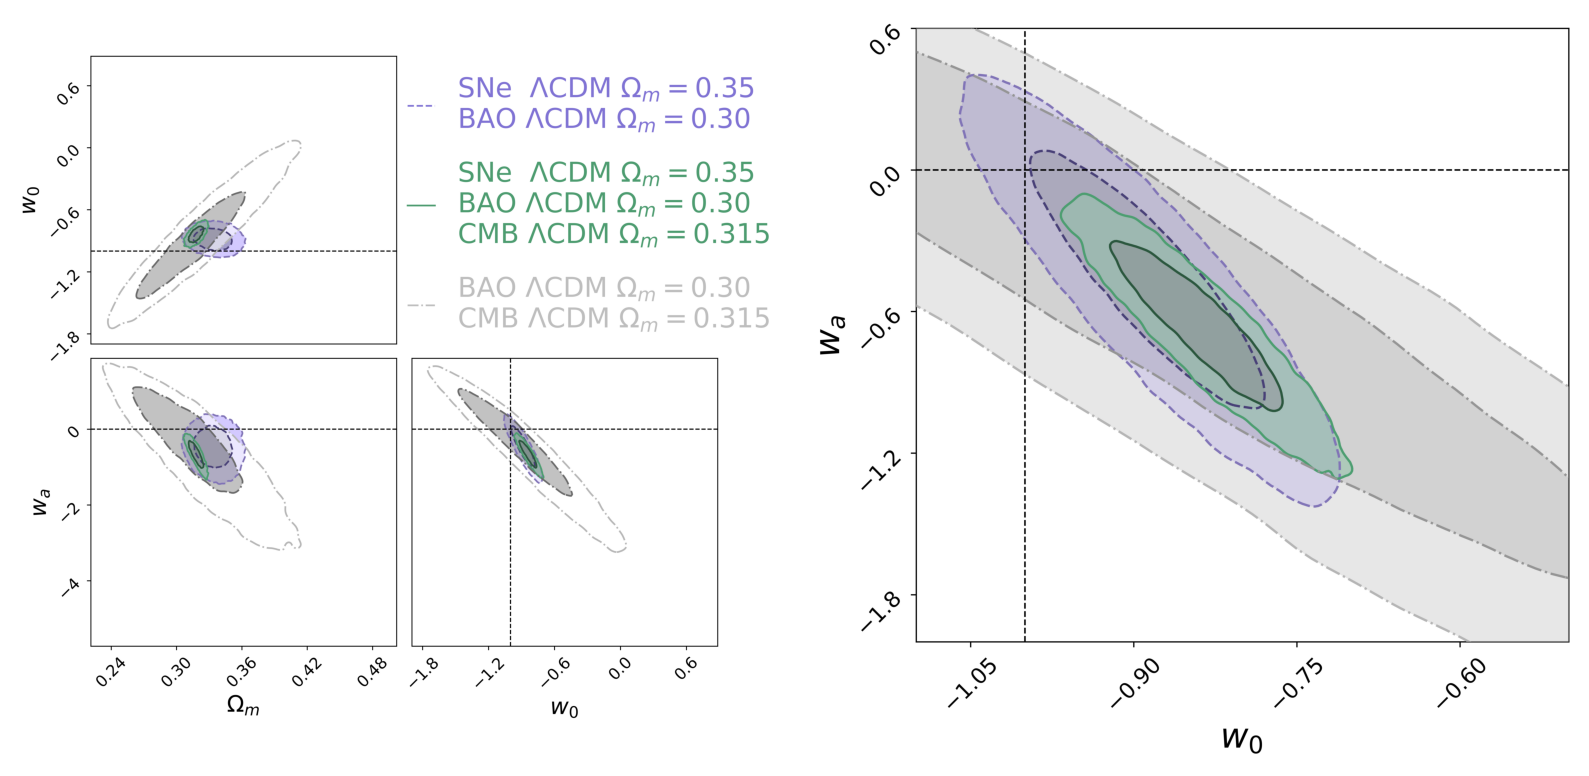

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('ltow0wa.png')
img2 = mpimg.imread('ltow0wa_w0wa.png')

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(img1)
axs[0].axis('off')  # Hide axes ticks
axs[1].imshow(img2)
axs[1].axis('off')  # Hide axes ticks

# Adjust layout and display the combined figure
plt.tight_layout()
plt.show()
fig.savefig("combined_ltow0wa.png", dpi=600, bbox_inches='tight')


In [16]:
#samples_bao_cmb = np.load('data/lcdm_CMB_BAO_differomm_all.npy')
samples_bao_cmb = np.load('data/lcdm_CMB_BAO_differomm_all_marginh0.npy')
#samples_bao_cmb_sne = np.load('data/lcdm_cmb_sne_bao_differomm_all.npy')
samples_bao_cmb_sne = np.load('data/lcdm_BAO_SNe_CMB_differ_omm_all_marginH.npy')
#samples_bao_sne = np.load('data/lcdm_BAO_SNe_differ_omm_all.npy')
samples_bao_sne = np.load('data/lcdm_BAO_SNe_differ_omm_all_marginh0.npy')

In [17]:
samples_bao_cmb

array([[ 0.3332541 , -0.57659906, -1.29573919, 64.87329542],
       [ 0.30145883, -0.9178592 , -0.27034009, 68.09892187],
       [ 0.34192298, -0.57245855, -1.19074382, 64.59081859],
       ...,
       [ 0.37566076, -0.12317391, -3.03536369, 62.02308976],
       [ 0.31526321, -0.78234737, -0.86190466, 67.43454717],
       [ 0.3288114 , -0.6294435 , -1.1122634 , 65.53450556]])

In [18]:
samples_bao_cmb_o= pd.DataFrame(samples_bao_cmb, columns=["$\Omega_m$", "$w_0$", "$w_a$", "$H_0$"])
samples_bao_cmb_sne_o = pd.DataFrame(samples_bao_cmb_sne, columns=["$\Omega_m$", "$w_0$", "$w_a$", "$H_0$", "M"]).drop(columns=["M"])
samples_bao_sne_o = pd.DataFrame(samples_bao_sne, columns=["$\Omega_m$", "$w_0$", "$w_a$", "$H_0$"])

In [19]:
def change_omm_to_ommh2(samples):
    # Calculate h
    h = samples["$H_0$"] / 100
    
    samples["$\Omega_m$$h^2$"] = samples["$\Omega_m$"] * h**2
        
    samples = samples.drop(columns=["$\Omega_m$", "$H_0$"])
    
    columns_order = ["$\Omega_m$$h^2$"] + [col for col in samples.columns if col not in ["$\Omega_m$$h^2$"]]
    samples = samples[columns_order]
    
    return samples

_samples_bao_cmb_sne = change_omm_to_ommh2(samples_bao_cmb_sne_o)
_samples_bao_sne = change_omm_to_ommh2(samples_bao_sne_o)
_samples_bao_cmb = change_omm_to_ommh2(samples_bao_cmb_o)
_samples_bao_cmb

,$\Omega_m$$h^2$,$w_0$,$w_a$
0,0.140251,-0.576599,-1.295739
1,0.139800,-0.917859,-0.270340
2,0.142649,-0.572459,-1.190744
3,0.143375,-0.417105,-2.063528
4,0.148213,0.195240,-3.589328
...,...,...,...
71095,0.145877,-1.123150,-0.304298
71096,0.144939,-0.537050,-1.388725
71097,0.144512,-0.123174,-3.035364
71098,0.143363,-0.782347,-0.861905


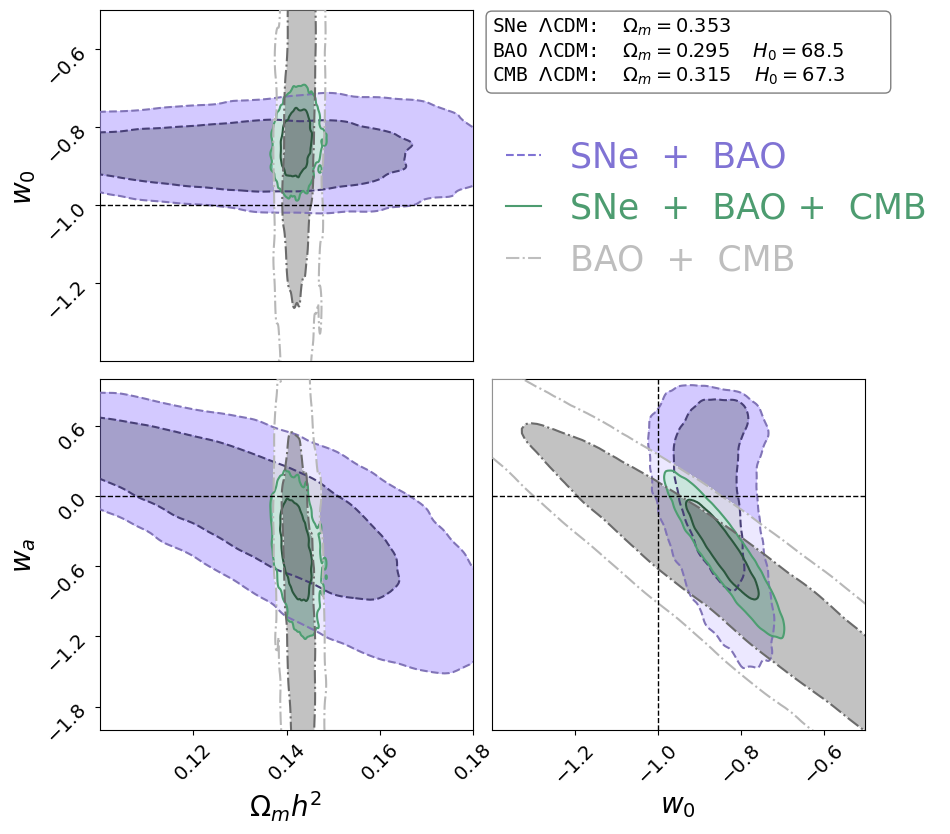

In [20]:
import pandas as pd
import numpy as np
from chainconsumer import Chain, ChainConfig, ChainConsumer, PlotConfig, Truth, make_sample
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

c = ChainConsumer()

c.add_chain(Chain(samples=_samples_bao_sne,
                    name="SNe  +  BAO",
                  color='#8073D4', linewidth=1.5,linestyle="--",alpha=0.5, histogram_relative_height=1.0))

plot_config = PlotConfig(
    shade=False,
)
c.set_plot_config(plot_config)

#c.add_chain(
  #  Chain(samples=data_sn_bao_cmb_cleaned[['$w_0$', '$w_a$', '$\\Omega_m$', 'weight']], 
  #        name="Planck+DES SNY5+eBOSS+3x2pt", 
  #        color="#D55E00"
   #       ,linestyle="-",linewidth=2.0)
     #     color="#D55E00")
#)

c.add_chain(Chain(samples=_samples_bao_cmb_sne,
                  name="SNe  +  BAO +  CMB",
                  color='#4D9C70',linestyle="-",linewidth=1.5, histogram_relative_height=1.0),)

c.add_chain(Chain(samples=_samples_bao_cmb, 
                   name="BAO  +  CMB",
                  color='#BEBEBE',linestyle="dashdot",linewidth=1.5, histogram_relative_height=1.0,),)


extents = {"$\Omega_m$$h^2$": (0.1, 0.18), "$w_0$":(-1.4,-0.5), "$w_a$":(-2,1)}

plot_config = PlotConfig(
    summary=True,
    bins=1.5,
    smooth=1.,
    shade=True,
    label_font_size=20,
    plot_hists=False,
    bar_shade=True,
    sigmas=[0, 1, 2],
    lengend=False,
    extents=extents,
    legend_kwargs={
       # "loc": (-0.9, 0), 
       # "loc": (-0.25, -0.15), 
        "loc": (-0.0, 0.2),
        "fontsize": 25,
        "frameon": False,
        "shadow": False, 
        "fancybox": True, 
        "framealpha": 1,
        "borderaxespad": 10,
        "ncol": 1,
        "labelspacing": 0.5
    }
)

c.set_plot_config(plot_config)
c.add_truth(Truth(location={"$w_0$": -1, "$w_a$": 0}))
#fig = c.plotter.plot(figsize="large")
# Plot with specified extents

fig = c.plotter.plot(figsize="large")
ax_list = fig.get_axes()


lines = [
    r"SNe $\Lambda$CDM:  $\Omega_m = 0.353$",
    r"BAO $\Lambda$CDM:  $\Omega_m = 0.295$  $H_0 = 68.5$",
    r"CMB $\Lambda$CDM:  $\Omega_m = 0.315$  $H_0 = 67.3$"
]
bbox_properties = {
    'boxstyle': 'round',
    'facecolor': 'white',
    'alpha': 0.5,
    'edgecolor': 'black',
    'linewidth': 1
}
max_length = max(len(line) for line in lines)

aligned_text = "\n".join(line.ljust(max_length) for line in lines)

for i, ax in enumerate(ax_list):
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=14)
    if i == 1:
        ax.text(0., 0.98, aligned_text,
                verticalalignment='top', horizontalalignment='left',
                transform=ax.transAxes,
                color='black', fontsize=14,
                bbox=bbox_properties,
                multialignment='left',
                family='monospace')
    
plt.show()
fig.savefig("omh2_ltow0wa.png", dpi=600, bbox_inches='tight')


In [21]:
print(c.analysis.get_latex_table())

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccc}
        \hline
		Model & $\Omega_m$$h^2$ & $w_0$ & $w_a$ \\ 
		\hline
		SNe  +  BAO & $0.136^{+0.027}_{-0.036}$ & $-0.856^{+0.054}_{-0.066}$ & $0.16^{+0.57}_{-0.50}$ \\ 
		SNe  +  BAO +  CMB & $\left( 141.9^{+2.4}_{-2.0} \right) \times 10^{-3}$ & $-0.851^{+0.065}_{-0.050}$ & $-0.44^{+0.27}_{-0.30}$ \\ 
		BAO  +  CMB & $\left( 143.0^{+2.1}_{-2.3} \right) \times 10^{-3}$ & $-0.70^{+0.37}_{-0.40}$ & $-0.66^{+0.79}_{-1.38}$ \\ 
		\hline
    \end{tabular}
\end{table}


In [22]:
import pandas as pd

lcdm_values = {"$w_0$": -1.0, "$w_a$": 0.0}

means = samples_bao_cmb_sne_o.mean()
stds = samples_bao_cmb_sne_o.std()

sigma_distances = {}
for param in lcdm_values.keys():
    sigma_distances[param] = (means[param] - lcdm_values[param]) / stds[param]

print("Sigma distances from ΛCDM:")
for param, sigma in sigma_distances.items():
    print(f"{param}: {sigma:.2f} sigma")

Sigma distances from ΛCDM:
$w_0$: 2.76 sigma
$w_a$: -1.66 sigma
